## Calibrating Tour Mode Choice
This script will iteratively perform updates to the tour mode choice coefficients config file in order to match model outputs to calibration targets.

The use of this tool is pretty advanced. This tool expects to run entirely automated, however in practice I (Andrew) did not run this in an automated fashion.

### Load Libraries

In [9]:
import pandas as pd
import numpy as np
import os
import matplotlib
import matplotlib.pyplot as plt
# import seaborn as sns
# sns.set()


import importlib
import asim_calib_util

importlib.reload(asim_calib_util)
from asim_calib_util import *
#import asim_calib_util
# check to make sure the dictionaries specifying names for calibration targets and activitysim outputs are consistent
asim_calib_util.check_input_dictionaries_for_consistency()

No problems found in input dictionaries


### Required Inputs
This script requires a working version of ActivitySim installed in the conda environment.  Input data sources are:
* Initial model output directory that includes household and tour files
* tour mode choice calibration target tables. Tables should be indexed by tour mode and columns should be auto sufficiency.  Tables should be broken down by tour purpose
* Model config directory containing the tour mode choice coefficients

Changes in tour modes and purposes can be implemented by changing the dictionaries at the top of asim_calib_util.py

In [10]:
# csv file containing calibration targets by tour mode choice.
# Column names and acceptable values should be set in dict at top of script
tour_mode_choice_calib_targets_file_autosuff = r"E:\Met_Council\survey_data\Phase2\obs_processing\output\tour_mode_choice_calibration_targets.csv"
tour_mode_choice_calib_targets_file_income = r"E:\Met_Council\metc-asim-model\source\calibration\target_data_phase_1\tour_mode_choice_calibration_targets_income.csv"

# location of configuration files
configs_dir = r"E:\Met_Council\metc-asim-model\source\activitysim\configs"
configs_mp_dir = None
data_dir = r"C:\RSG_test\semcog\Model_Runs\SEMCOG_ABM_2.4\Input\Data"

warm_start_settings_file = r"C:\RSG_test\semcog\Tasks\Tour_mc_calib\settings_warm_start.yaml"
warm_start_settings_mp_file = r"C:\RSG_test\semcog\Tasks\Tour_mc_calib\settings_mp_warm_start.yaml"
cold_start_settings_mp_file = r"C:\RSG_test\semcog\Tasks\Tour_mc_calib\settings_mp_cold_start.yaml"
tour_mc_coef_file = None

# output location
output_dir = r"E:\Met_Council\metc-asim-model\Base_2022\activitysim\output"
activitysim_run_dir = r"C:\RSG_test\semcog\Tasks\Tour_mc_calib\asim_run_dir"

# calibration iterations
calibration_iterations_to_run = 3

# want to do intial model run first?
want_to_do_initial_model_run = True  # True or False

# calibration settings

max_ASC_adjust = 3 # maximum allowed adjustment per iteration
damping_factor = 0.6 # constant multiplied to all adjustments
adjust_when_zero_counts = 2 # coefficient change when have target counts but no model counts (or vise-versa)


--------------- User should not have to change anything below this line ----------------------

# Initial Status

Sample rate of  0.194 results in  953724 out of 4916103 tours


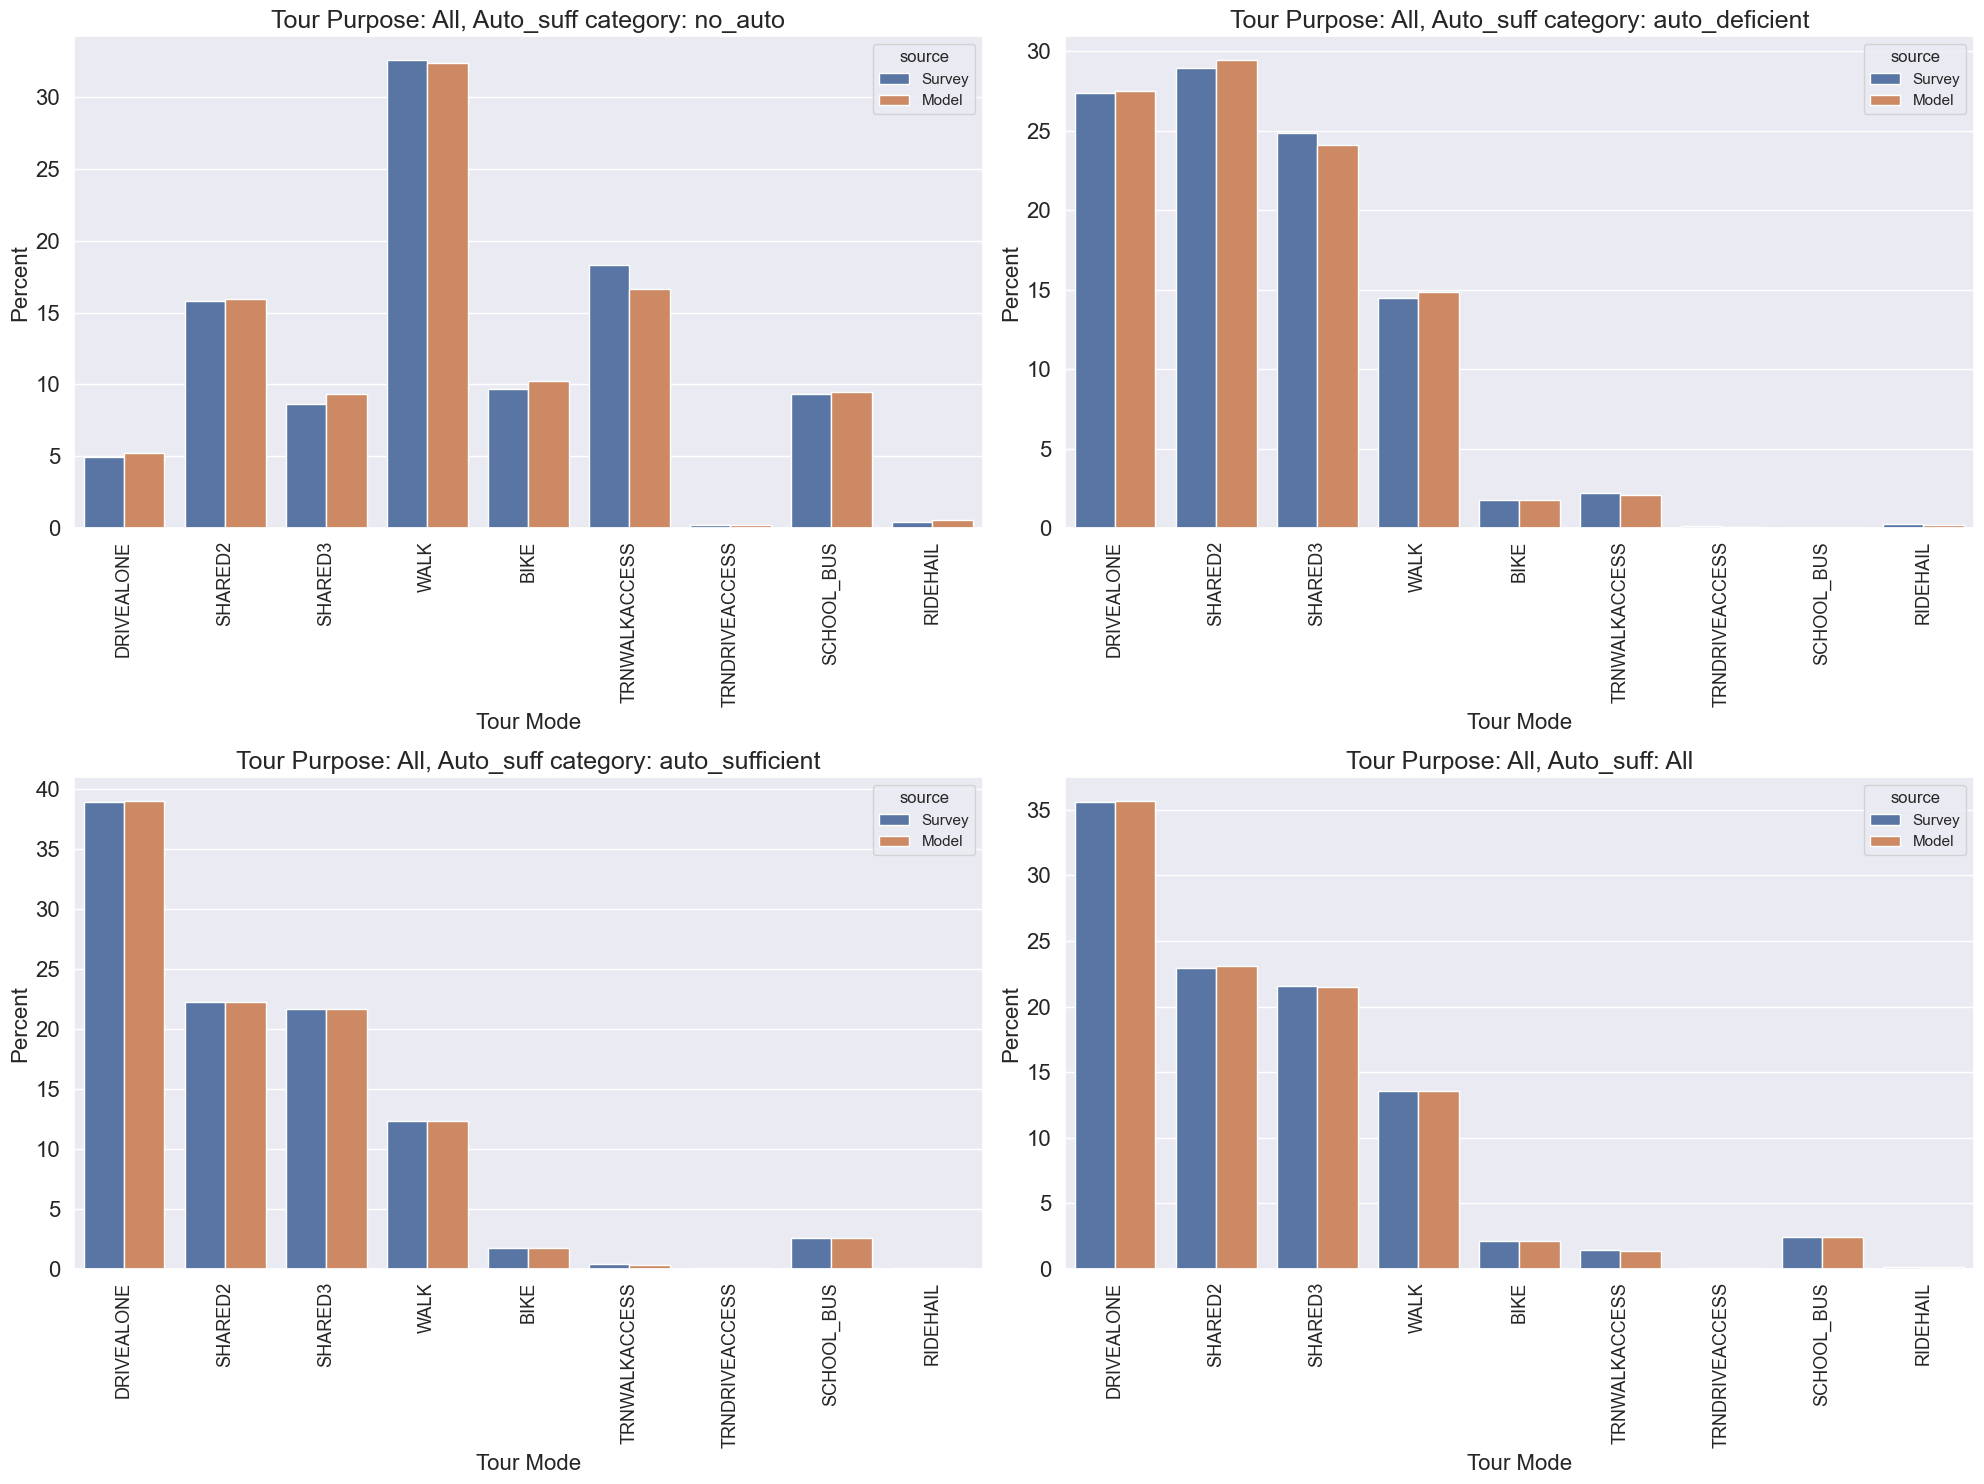

Coefficient Statistics: 
	 367 total coefficients
	 11 constrained coefficients
	 244 coefficients adjusted
	 329 coefficients converged
	 38 coefficients not converged


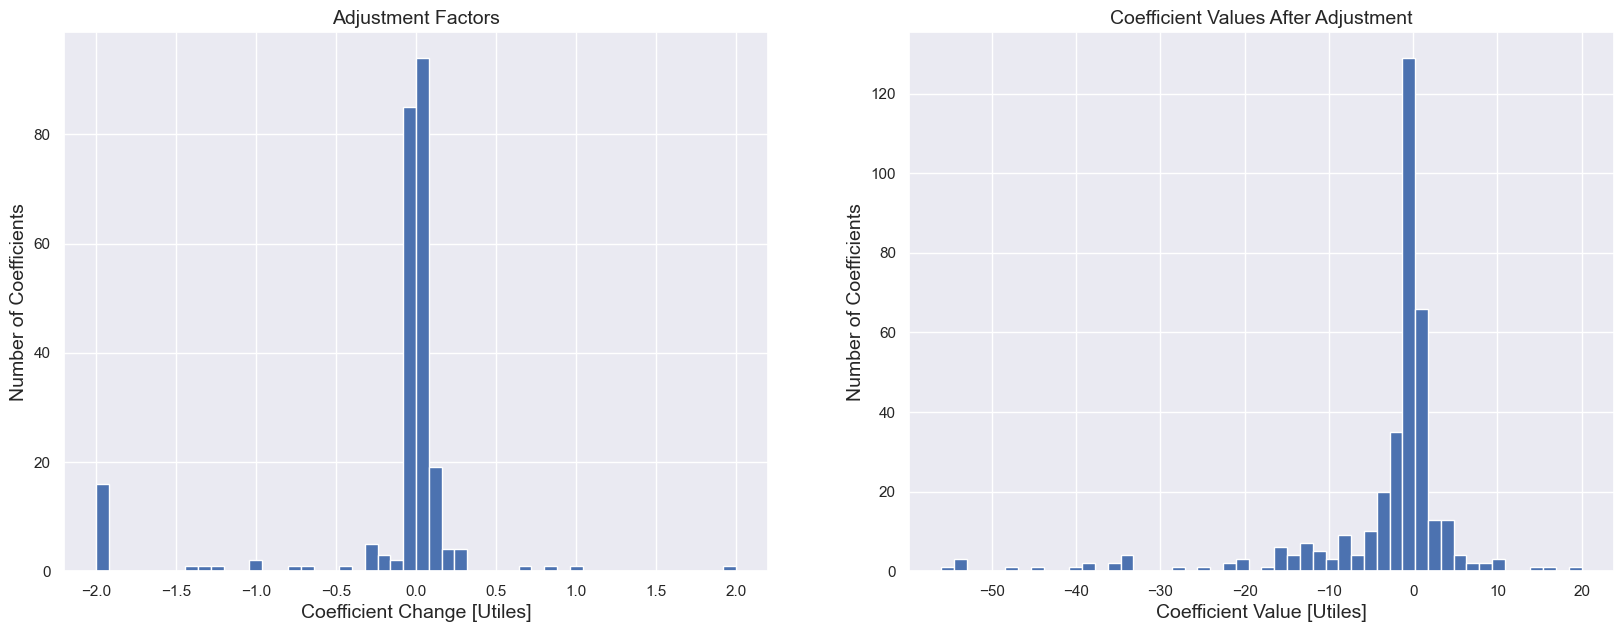

Top 10 largest coefficients:


,coefficient_name,value,model_counts,target_counts,coef_change,new_value,converged
147,sr2_ASC_no_auto_univ,-54.000000,5.0,0.0,-2,-56.000000,True
116,sov_ASC_no_auto_univ,-52.000000,52.0,0.0,-2,-54.000000,True
176,sr3p_ASC_no_auto_univ,-52.000000,52.0,0.0,-2,-54.000000,True
277,rideshare_ASC_no_auto_univ,-52.000000,26.0,0.0,-2,-54.000000,True
355,joint_rideshare_ASC_no_auto_joint_maint,-45.373745,26.0,0.0,-2,-47.373745,True
319,joint_sr3p_ASC_no_auto_joint_maint,-42.412494,175.0,0.0,-2,-44.412494,False
178,sr3p_ASC_no_auto_atwork,-38.000000,41.0,0.0,-2,-40.000000,True
265,rideshare_ASC_no_auto_atwork,-36.947852,144.0,0.0,-2,-38.947852,False
139,sr2_ASC_no_auto_atwork,-36.248084,459.0,0.0,-2,-38.248084,False
308,joint_sr2_ASC_no_auto_joint_discr,-34.000000,15.0,0.0,-2,-36.000000,True


In [13]:
_ = perform_tour_mode_choice_model_calibration(
    asim_output_dir=output_dir, # folder containing the activitysim model output
    asim_configs_dir=configs_dir,  # folder containing activitysim tour mode choice config files
    tour_mode_choice_calib_targets_file_autosuff = tour_mode_choice_calib_targets_file_autosuff, #edited
    tour_mode_choice_calib_targets_file_income = tour_mode_choice_calib_targets_file_income,  # folder containing tour mode choice calibration tables
    max_ASC_adjust=max_ASC_adjust,  
    damping_factor=damping_factor,  # constant multiplied to all adjustments
    adjust_when_zero_counts=adjust_when_zero_counts,
    output_dir=output_dir,  # location to write model calibration steps
    )


## Initial Model Run

In [ ]:
if want_to_do_initial_model_run:
    run_activitysim(
        data_dir=data_dir,  # data inputs for ActivitySim
        configs_dir=configs_dir,  # these files are copied to the config section of the run directory
        run_dir=activitysim_run_dir,  # ActivitySim run directory
        output_dir=output_dir,  # location to store run model outputs
        settings_file=cold_start_settings_mp_file,  # optional: ActivitySim settings.yaml to replace the one in configs_dir
        tour_mc_coef_file=tour_mc_coef_file,  # optional: tour_mode_choice_coeffs.csv to replace the one in configs_dir
        configs_mp_dir=configs_mp_dir  # optional: location of config files for multiprocessing
    )
    
    print('asim run done')
    
    _ = perform_tour_mode_choice_model_calibration(
        asim_output_dir=output_dir, # folder containing the activitysim model output
        asim_configs_dir=configs_dir,  # folder containing activitysim tour mode choice config files
        tour_mode_choice_calib_targets_file_autosuff = tour_mode_choice_calib_targets_file_autosuff, #edited
        tour_mode_choice_calib_targets_file_income = tour_mode_choice_calib_targets_file_income,  # folder containing tour mode choice calibration tables
        max_ASC_adjust=max_ASC_adjust,  
        damping_factor=damping_factor,  # constant multiplied to all adjustments
        adjust_when_zero_counts=adjust_when_zero_counts,
        output_dir=output_dir,  # location to write model calibration steps
    )
    tour_mc_coef_file = os.path.join(output_dir, 'tour_mode_choice_coeffs.csv') 
else:
    print("No initial model run performed.")




## Iterating

In [ ]:
iteration_output_dir = output_dir + '_0'
#calibration_iterations_to_run
for i in range(calibration_iterations_to_run):
    run_activitysim(
         data_dir=data_dir,  # data inputs for ActivitySim
         configs_dir=configs_dir,  # these files are copied to the config section of the run directory
         run_dir=activitysim_run_dir,  # ActivitySim run directory
         output_dir=iteration_output_dir,  # location to store run model outputs
         settings_file=warm_start_settings_mp_file,  # optional: ActivitySim settings.yaml to replace the one in configs_dir
         tour_mc_coef_file=tour_mc_coef_file,  # optional: tour_mode_choice_coeffs.csv to replace the one in configs_dir
         configs_mp_dir=configs_mp_dir  # optional: location of config files for multiprocessing
     )

    _ = perform_tour_mode_choice_model_calibration(
        asim_output_dir=iteration_output_dir, # folder containing the activitysim model output
        asim_configs_dir=os.path.join(activitysim_run_dir, 'configs'),  # folder containing tour mode choice config files
        tour_mode_choice_calib_targets_file_autosuff = tour_mode_choice_calib_targets_file_autosuff, #edited
        tour_mode_choice_calib_targets_file_income = tour_mode_choice_calib_targets_file_income, # folder containing tour mode choice calibration tables
        max_ASC_adjust=max_ASC_adjust,  # maximum allowed adjustment per iteration
        damping_factor=damping_factor,  # constant multiplied to all adjustments
        adjust_when_zero_counts=adjust_when_zero_counts,
        output_dir=iteration_output_dir,  # location to write model calibration steps
    )
    
    tour_mc_coef_file = os.path.join(iteration_output_dir, 'tour_mode_choice_coeffs.csv')
    iteration_output_dir = iteration_output_dir.strip('_'+str(i)) + '_' + str(i+1)

print("\n\n", "Final coefficient table written to: ", tour_mc_coef_file)